In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
###with weights
#%run -i ./tools/train_net.py --gpu 2 --solver models/rpn_uboone/alex_nu_v04/faster_rcnn_end2end/solver.prototxt --imdb rpn_uboone_train_1 --iters 700000 --weights /data/drinkingkazu/v04/nu_alex/lowres_event/snapshot_rmsprop_iter_6000.caffemodel.h5 --cfg experiments/cfgs/nu_cosmic_train_v04.yml

###without weights
#%run -i ./tools/train_net.py --gpu 2 --solver models/rpn_uboone/alex_nu_v04/faster_rcnn_end2end/solver.prototxt --imdb rpn_uboone_train_1 --iters 700000 --cfg experiments/cfgs/nu_cosmic_train_v04.yml
#/home/vgenty/py-faster-rcnn-lmdb/output/faster_rcnn_end2end/rpn_uboone_train_1/rpn_uboone_trimese_2__iter_497.caffemodel
%run ./tools/train_net.py --gpu 2 --solver models/rpn_uboone/trimese_2/faster_rcnn_end2end/solver.prototxt --weights /home/vgenty/py-faster-rcnn-lmdb/output/faster_rcnn_end2end/rpn_uboone_train_1/trimese_single_plane/rpn_uboone_trimese_2__iter_13150.caffemodel --imdb rpn_uboone_train_1 --iters 700000 --cfg experiments/cfgs/faster_rcnn_end2end_trimese.yml
#%run ./tools/train_net.py --gpu 2 --solver models/rpn_uboone/trimese_2/faster_rcnn_end2end/solver.prototxt --weights /home/vgenty/py-faster-rcnn-lmdb/output/faster_rcnn_end2end/rpn_uboone_train_1/rpn_uboone_trimese_2__iter_1505.caffemodel --imdb rpn_uboone_train_1 --iters 700000 --cfg experiments/cfgs/faster_rcnn_end2end_trimese.yml

/home/vgenty/py-faster-rcnn-lmdb/tools/../caffe-fast-rcnn/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/vgenty/py-faster-rcnn-lmdb/tools/../caffe-fast-rcnn/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


Called with args:
Namespace(cfg_file='experiments/cfgs/faster_rcnn_end2end_trimese.yml', gpu_id=2, imdb_name='rpn_uboone_train_1', max_iters=700000, pretrained_model='/home/vgenty/py-faster-rcnn-lmdb/output/faster_rcnn_end2end/rpn_uboone_train_1/trimese_single_plane/rpn_uboone_trimese_2__iter_13150.caffemodel', randomize=False, set_cfgs=None, solver='models/rpn_uboone/trimese_2/faster_rcnn_end2end/solver.prototxt')
Using config:
{'DATA_DIR': '/home/vgenty/py-faster-rcnn-lmdb/data',
 'DEBUG': False,
 'DEDUP_BOXES': 0.0625,
 'EPS': 1e-14,
 'EXP_DIR': 'faster_rcnn_end2end',
 'GPU_ID': 2,
 'MATLAB': 'matlab',
 'MODELS_DIR': '/share/vgenty/py-faster-rcnn/models/rpn_uboone',
 'PIXEL_MEANS': array([[[ 0.16552393,  0.04425343,  1.10163933,  0.12954401,  0.2012022 ,
          0.04798073,  1.32870532,  0.15412298,  0.19998545,  0.02612594,
          0.97823862,  0.30358605]]]),
 'RMSPROP': False,
 'RNG_SEED': 3,
 'ROOT_DIR': '/home/vgenty/py-faster-rcnn-lmdb',
 'TEST': {'BBOX_REG': True,
       

KeyboardInterrupt: 

In [ ]:
_sw.solver.net.blobs['data'].data.shape
from fast_rcnn.bbox_transform import clip_boxes, bbox_transform_inv  

(768, 788, 12)


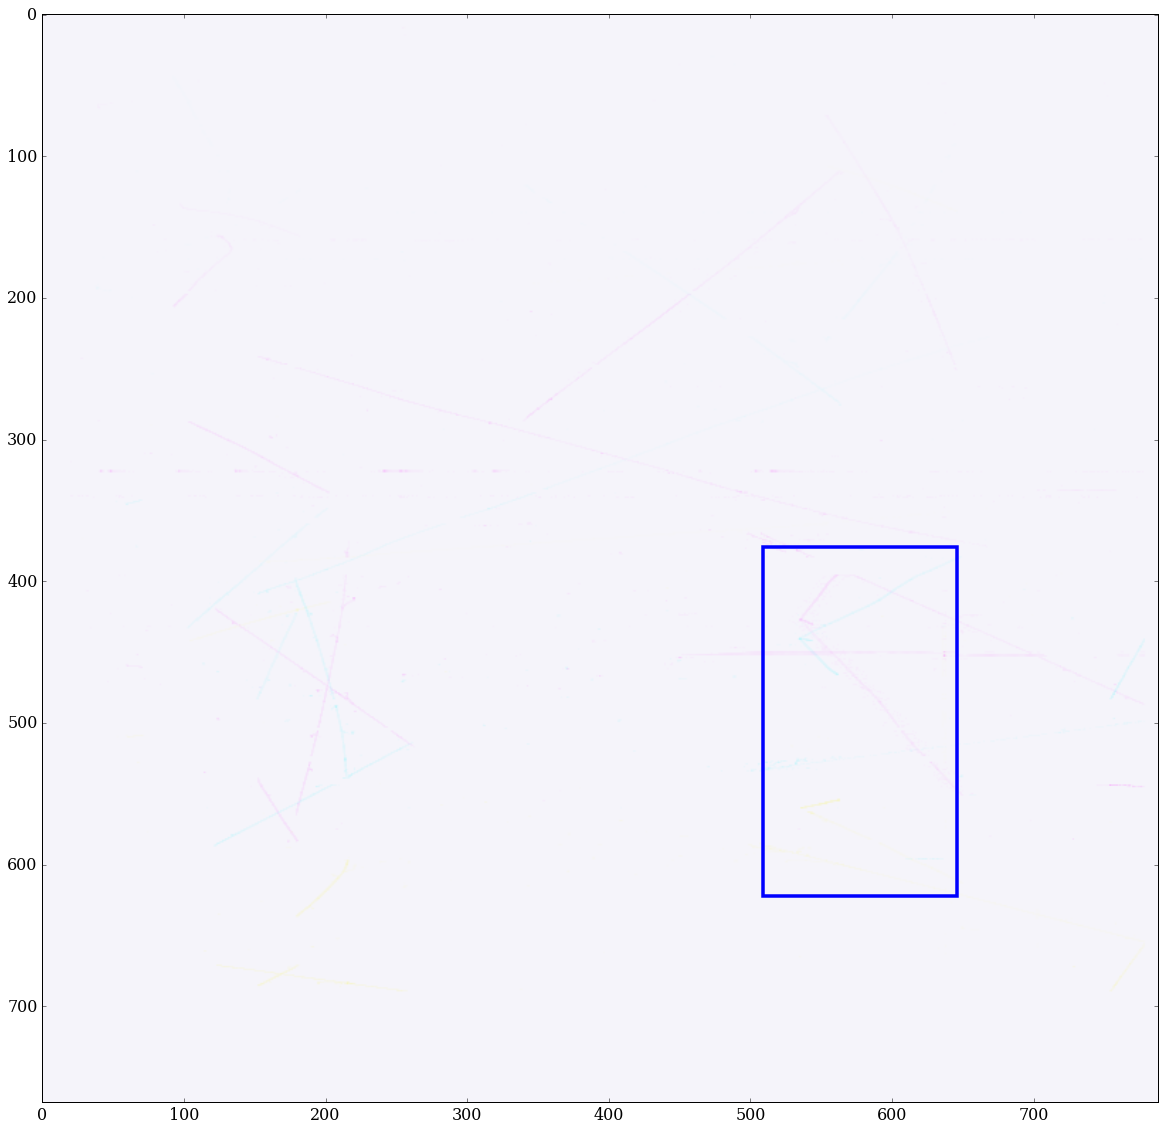

In [23]:
_sw.solver.step(1)

#scores = _sw.solver.net.blobs['cls_score'].data
#boxes = _sw.solver.net.blobs['rois'].data[:, 1:5]
#box_deltas = _sw.solver.net.blobs['bbox_pred'].data
#pred_boxes = bbox_transform_inv(boxes, box_deltas) 
#pred_boxes = clip_boxes(pred_boxes, (756,864))
#cls_ind = 0
#cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
#cls_scores = scores[:, cls_ind]
#dets = np.hstack((cls_boxes,
#                  cls_scores[:, np.newaxis])).astype(np.float32) 

data = _sw.solver.net.blobs['data'].data
iminfo = _sw.solver.net.blobs['im_info'].data
gtboxes = _sw.solver.net.blobs['gt_boxes'].data
print data[0].transpose(2,1,0).shape
image = data[0].transpose(2,1,0).astype(np.float32)

fig,ax = plt.subplots(figsize=(20,20))
imm = np.zeros([image.shape[0],image.shape[1],3])
    
ch = 1
imm[:,:,0] = image[:,:,ch]
imm[:,:,1] = image[:,:,ch+4]
imm[:,:,2] = image[:,:,ch+4+4]
    
image = imm
plt.imshow(image)
a = [ gt for gt in gtboxes ]
for aa in a:
    ax.add_patch(plt.Rectangle( (aa[1],aa[0]),aa[3]-aa[1], 
                                 aa[2]-aa[0],
                                 fill=False,
                                 edgecolor='blue',
                                 linewidth=3.5))
    
#put in the top class

#ax.add_patch(plt.Rectangle((rr[1],rr[0]),
#                            rr[3]-rr[1],
#                            rr[2]-rr[0],
#                            fill=False,
#                            edgecolor='purple',
#                            linewidth=3.5))

plt.show()

In [ ]:
np.max(image)

In [20]:
_sw.train_model(11500)

Wrote snapshot to: /home/vgenty/py-faster-rcnn-lmdb/output/faster_rcnn_end2end/rpn_uboone_train_1/rpn_uboone_trimese_2__iter_11850.caffemodel


[u'/home/vgenty/py-faster-rcnn-lmdb/output/faster_rcnn_end2end/rpn_uboone_train_1/rpn_uboone_trimese_2__iter_11850.caffemodel']

In [ ]:
# It is the size of the responses at the (5th) convolutional layer. 
# Usually, it has a resolution of a downsampled image by a factor of 16 
# (plus/minus offsets due to pooling / padding).
for i in xrange(18):
    fig,ax = plt.subplots(figsize=(10,6))
    plt.imshow(_sw.solver.net.blobs['rpn_cls_score'].data[0][i],cmap='Greys')
    #plt.savefig('_{}.jpeg'.format(i), format='jpeg', dpi=200)
    plt.show()

In [4]:
s1 = []
s2 = []

In [21]:
for i in xrange(1000):
    _sw.solver.step(1)
    scores = _sw.solver.net.blobs['cls_score'].data
    #boxes = _sw.solver.net.blobs['rois'].data[:, 1:5]
    #box_deltas = _sw.solver.net.blobs['bbox_pred'].data
    #pred_boxes = bbox_transform_inv(boxes, box_deltas)  
    #pred_boxes = clip_boxes(pred_boxes, (788,768))
    #cls_ind = 0
    #cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
    #cls_scores = scores[:, cls_ind]
    #dets = np.hstack((cls_boxes,
    #                 cls_scores[:, np.newaxis])).astype(np.float32) 
    s1.append(scores[0][0])
    s2.append(scores[0][1])

KeyboardInterrupt: 

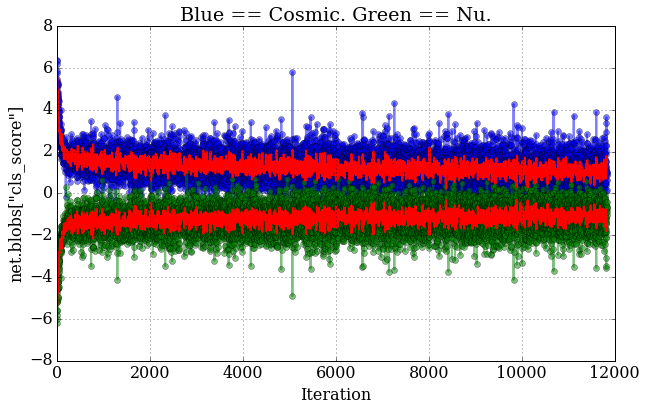

In [19]:
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
import pandas as pd
fig,ax = plt.subplots(figsize=(10,6))
ss1 = pd.Series(s1)
ss2 = pd.Series(s2)
ax.plot(np.arange(0,len(s1),1),ss1.rolling(window=1).mean(),'-o',alpha=0.5,lw=2,color='blue')
ax.plot(np.arange(0,len(s2),1),ss2.rolling(window=1).mean(),'-o',alpha=0.5,lw=2,color='green')
ax.plot(np.arange(0,len(s1),1),ss1.rolling(window=10).mean(),'-',alpha=1.0,lw=2,color='red')
ax.plot(np.arange(0,len(s2),1),ss2.rolling(window=10).mean(),'-',alpha=1.0,lw=2,color='red') 
ax.set_xlabel("Iteration")
ax.set_ylabel("net.blobs[\"cls_score\"]")
ax.set_title("Blue == Cosmic. Green == Nu.")
ax.grid()
#plt.savefig('tarinet_cosmic_train_13150.jpeg'.format(i), format='jpeg', dpi=200)
plt.show()

In [ ]:
for i in xrange(2):
    fig,ax = plt.subplots(figsize=(20,50))
    plt.imshow(_sw.solver.net.blobs['rpn_cls_prob'].data[0][i],cmap='Greys')
    plt.show()

In [ ]:
for i in xrange(36):
    plt.imshow(_sw.solver.net.blobs['rpn_bbox_targets'].data[0][i],cmap='Greys')
    plt.show()

In [ ]:
dets[:,4]

In [ ]:
plt.imshow(_sw.solver.net.params['rpn_cls_score'][0].data[:,:,0,0],cmap='Greys')

In [ ]:
plt.imshow(_sw.solver.net.params['rpn_bbox_pred'][0].data[:,:,0,0],cmap='Greys')

In [ ]:
plt.imshow(_sw.solver.net.params['rpn_conv/3x3'][0].data[3][4],cmap='Greys')

In [ ]:
for i in xrange(96):
    plt.imshow(_sw.solver.net.params['conv1'][0].data[i][0],cmap='Greys')
    plt.show()